In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sys.path.append(os.path.abspath('../src/'))
from ModelSelection import *
from ActivationFunctions import *
from NeuralNetwork import *
from MyUtils import *

In [2]:
cup_df = pd.read_csv(
    '../data/ML-CUP23-TR.csv',
    index_col=0,
    comment='#',
    header=None,
    names=['feature_' + str(i+1) for i in range(10)] + ['target_' + str(i+1) for i in range(3)]
)

data_set = cup_df.values
len_data = len(data_set)
np.random.shuffle(data_set)

training_len = int(0.8*len_data)

training_set = data_set[:int(training_len)] # Training Set for KFold Cross Validation
test_set = data_set[int(training_len):] # Hold Out Test Set

TR_OUTPUT = 3
TR_INPUT = data_set.shape[1] - TR_OUTPUT

scaler_out = StandardScaler()
scaler_in = StandardScaler()
scaler_in.fit(training_set[:,:TR_INPUT])
scaler_out.fit(training_set[:,TR_INPUT:])

tr_normalized = np.empty((training_len, TR_OUTPUT + TR_INPUT))
tr_normalized[:,:TR_INPUT] = scaler_in.transform(training_set[:,:TR_INPUT])
tr_normalized[:,TR_INPUT:] = scaler_out.transform(training_set[:,TR_INPUT:])

test_normalized = np.empty((len_data - training_len, TR_OUTPUT + TR_INPUT))
test_normalized[:,:TR_INPUT] = scaler_in.transform(test_set[:,:TR_INPUT])
test_normalized[:,TR_INPUT:] = scaler_out.transform(test_set[:,TR_INPUT:])

In [3]:
hidden_fun = 'tanh'
output_fun = 'identity'
tanh_l2 = create_stratified_topology([TR_INPUT,12, 12,TR_OUTPUT], 
                                      [[None,[]]]*TR_INPUT + [[hidden_fun, [1]]]*12 + [[hidden_fun, [1]]]*12 + [[output_fun, []]]*TR_OUTPUT)

hidden_fun = 'ReLU'
output_fun = 'identity'
relu_l2 = create_stratified_topology([TR_INPUT,12, 12,TR_OUTPUT], 
                                      [[None,[]]]*TR_INPUT + [[hidden_fun, [1]]]*12 + [[hidden_fun, [1]]]*12 + [[output_fun, []]]*TR_OUTPUT)

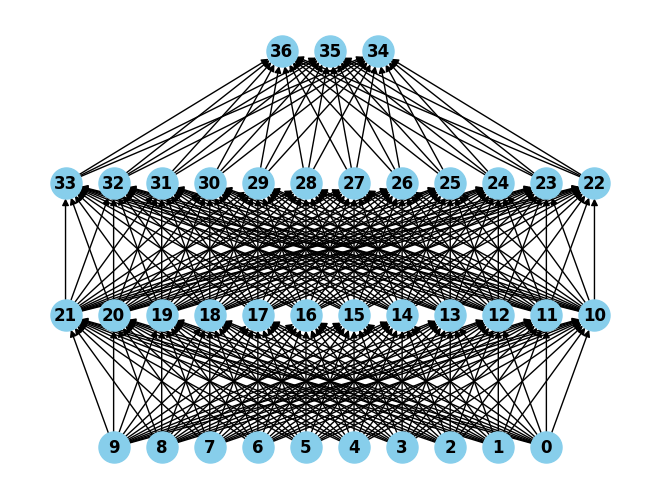

In [4]:
NeuralNetwork.display_topology(relu_l2)

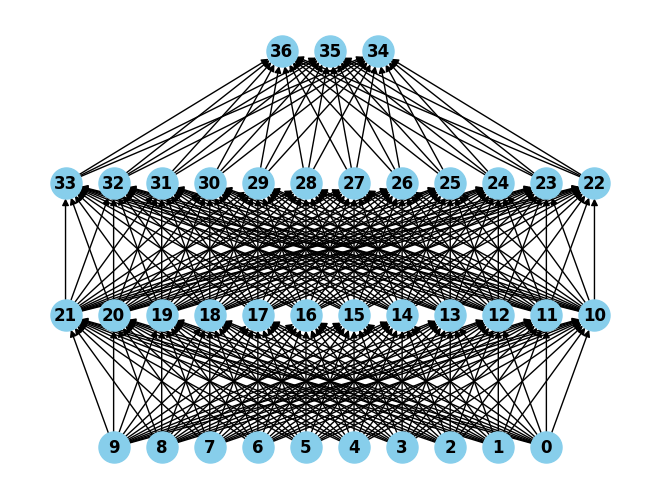

In [5]:
NeuralNetwork.display_topology(tanh_l2)

In [6]:
MS = ModelSelection('../data/2l_tanh_2.csv')
    
hyperparam_grid = {
    'learning_rate':[0.005, 0.02, 0.1, 0.2],
    'lr_decay_tau':[250],
    'adamax' : [True, False],
    'adamax_learning_rate' : [0.3, 0.5],
    'exp_decay_rate_1':[0.8, 0.7],
    'exp_decay_rate_2':[0.999],
    'alpha_momentum':[0.5, 0.75, 0.9],
    'lambda_tikhonov':[0.001, 0.0001],
    'batch_size':[int(training_len/20), int(training_len/40)],
    'min_epochs': [100],
    'max_epochs':[600],
    'metrics':[[ErrorFunctions.mean_euclidean_error, ErrorFunctions.mean_squared_error]],
    'error_increase_tolerance':[0.00001],
    'patience':[8],
    'topology': [str(tanh_l2)],
}

c1 = lambda x: x
constr = {'adamax': (c1, ['learning_rate', 'alpha_momentum', 'lr_decay_tau'], ['adamax_learning_rate', 'exp_decay_rate_1', 'exp_decay_rate_2'])}

MS.grid_searchKF(tr_normalized, hyperparam_grid, constr, 3, 12, True)

tot conf: 64


/home/geco/ML_Proj_NN/src/ModelSelection.py:244: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pandas.concat([pandas.read_csv(f, header = 0) for f in backup_file], ignore_index=True)


1284started new kfold 
1285 started new kfold1290
 started new kfold
1299 started new kfold
1308 1317started new kfold started new kfold

1326 started new kfold
1341 started new kfold1350
 started new kfold1353
 1362 started new kfold1367started new kfold

 started new kfold
1350 started new kfold
1284 started new kfold
1299 started new kfold
1353 started new kfold
1299 started new kfold
1362 started new kfold
1341 started new kfold
1285 started new kfold
1317 started new kfold
1308 started new kfold
1290 started new kfold
1326 started new kfold
1367 started new kfold
1362 started new kfold
1350 started new kfold
1317 started new kfold
1284 started new kfold
1353 started new kfold
1284 started new kfold
1290 started new kfold
1284 started new kfold
1353 started new kfold
1326 started new kfold
1341 started new kfold
1299 started new kfold
1285 started new kfold
1308 started new kfold
1367 started new kfold
1317 started new kfold
1362 started new kfold
1350 started new kfold
1353 starte

KeyboardInterrupt: 

In [ ]:
MS = ModelSelection('../data/2l_relu_2.csv')
    
hyperparam_grid = {
    'learning_rate':[0.005, 0.02, 0.1, 0.2],
    'lr_decay_tau':[250],
    'adamax' : [True, False],
    'adamax_learning_rate' : [0.3, 0.5],
    'exp_decay_rate_1':[0.8, 0.7],
    'exp_decay_rate_2':[0.999],
    'alpha_momentum':[0.5, 0.75, 0.9],
    'lambda_tikhonov':[0.001, 0.0001],
    'batch_size':[int(training_len/20), int(training_len/40)],
    'min_epochs': [100],
    'max_epochs':[600],
    'metrics':[[ErrorFunctions.mean_euclidean_error, ErrorFunctions.mean_squared_error]],
    'error_increase_tolerance':[0.00001],
    'patience':[8],
    'topology': [str(relu_l2)],
}

c1 = lambda x: x
constr = {'adamax': (c1, ['learning_rate', 'alpha_momentum', 'lr_decay_tau'], ['adamax_learning_rate', 'exp_decay_rate_1', 'exp_decay_rate_2'])}

MS.grid_searchKF(tr_normalized, hyperparam_grid, constr, 3, 12, True)